Learned theta_0 (Intercept): 0.0412
Learned theta_1 (Slope): 2.9994
Predicted price for 70 m^2: 210.00


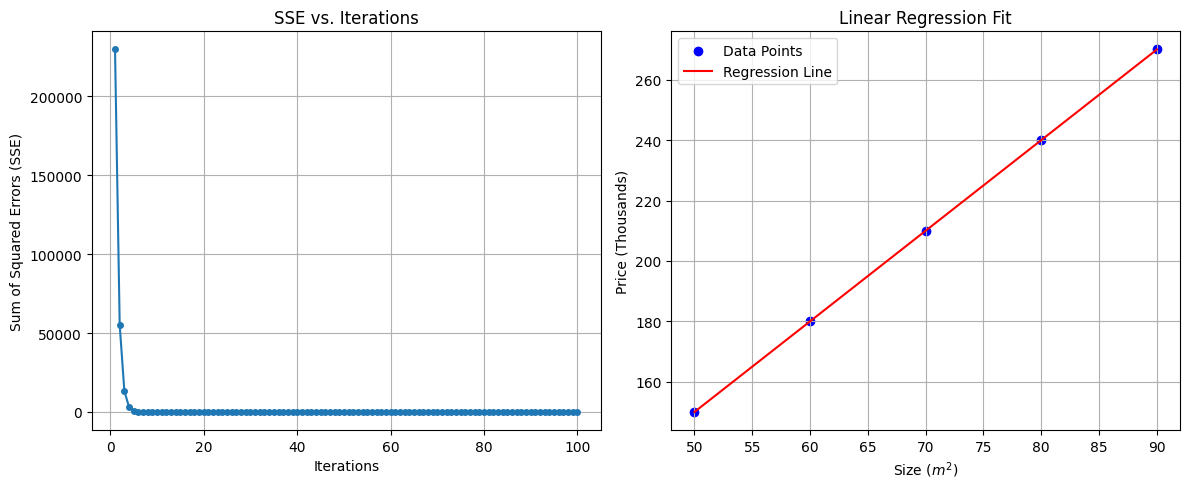

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0  # Intercept
        self.theta_1 = 0  # Slope
        self.costs = []   # To store SSE over iterations

    def fit(self, X, y):
        # 1. Initialize parameters
        self.theta_0 = 0
        self.theta_1 = 0
        self.costs = []
        
        m = len(y) # Number of training examples

        for _ in range(self.n_iters):
            # 2. Calculate Prediction (Hypothesis)
            y_pred = (self.theta_1 * X) + self.theta_0
            
            # 3. Calculate Errors
            errors = y_pred - y
            
            # 4. Calculate SSE (Sum of Squared Errors) for visualization
            sse = np.sum(errors ** 2)
            self.costs.append(sse)
            
            # 5. Calculate Gradients
            # Note: Using standard gradient descent update rules
            d_theta_1 = (1/m) * np.sum(errors * X)
            d_theta_0 = (1/m) * np.sum(errors)
            
            # 6. Update Parameters
            self.theta_1 -= self.lr * d_theta_1
            self.theta_0 -= self.lr * d_theta_0

    def predict(self, X):
        return (self.theta_1 * X) + self.theta_0

    def plot_training(self, X, y):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Plot 1: SSE over iterations
        ax1.plot(range(1, self.n_iters + 1), self.costs, marker='o', markersize=4)
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Sum of Squared Errors (SSE)')
        ax1.set_title('SSE vs. Iterations')
        ax1.grid(True)

        # Plot 2: Regression Line with Data Points
        ax2.scatter(X, y, color='blue', label='Data Points')
        ax2.plot(X, self.predict(X), color='red', label='Regression Line')
        ax2.set_xlabel('Size ($m^2$)')
        ax2.set_ylabel('Price (Thousands)')
        ax2.set_title('Linear Regression Fit')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

# --- Task Execution ---

# 1. Load Data
# Question: What do X and y represent?
# Answer: X represents the House Size (in m^2), and y represents the House Price (in thousands).
data_X = [50, 60, 70, 80, 90]
data_y = [150, 180, 210, 240, 270]

# 2. Convert to numpy arrays
X = np.array(data_X)
y = np.array(data_y)

# 3. Create and Train the Model
model = LinearRegressionGD(learning_rate=0.0001, n_iters=100)
# Note: With raw data (50, 60...), a learning rate of 0.001 might be too large and cause divergence 
# due to the magnitude of X. I adjusted to 0.0001 for stability on raw data, or we could normalize X.
model.fit(X, y)

# 4. Print learned values
print(f"Learned theta_0 (Intercept): {model.theta_0:.4f}")
print(f"Learned theta_1 (Slope): {model.theta_1:.4f}")

# 5. Prediction
size_to_predict = 70
predicted_price = model.predict(size_to_predict)
print(f"Predicted price for 70 m^2: {predicted_price:.2f}")

# 6. Visualization
model.plot_training(X, y)